# Loop 21 Analysis: Strategic Assessment

## Current State
- Best LB: 0.0913 (exp_012)
- Best CV: 0.009004 (exp_012)
- Target: 0.0333
- Gap to target: 2.74x

## Key Questions
1. What unexplored approaches remain?
2. What is the CV-LB relationship telling us?
3. What is the most promising path forward?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
]

df = pd.DataFrame(submissions)
print("Submission History:")
print(df.to_string(index=False))

# Calculate CV-LB ratio
df['ratio'] = df['lb'] / df['cv']
print(f"\nCV-LB Ratios:")
print(df[['exp', 'cv', 'lb', 'ratio']].to_string(index=False))

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913

CV-LB Ratios:
    exp     cv     lb     ratio
exp_000 0.0111 0.0982  8.846847
exp_001 0.0123 0.1065  8.658537
exp_003 0.0105 0.0972  9.257143
exp_005 0.0104 0.0969  9.317308
exp_006 0.0097 0.0946  9.752577
exp_007 0.0093 0.0932 10.021505
exp_009 0.0092 0.0936 10.173913
exp_012 0.0090 0.0913 10.144444


In [2]:
# Linear regression to understand CV-LB relationship
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nTo achieve target LB = 0.0333:")
required_cv = (0.0333 - intercept) / slope
print(f"Required CV = {required_cv:.6f}")

if required_cv < 0:
    print(f"\n⚠️ IMPOSSIBLE: Required CV is negative!")
    print(f"The intercept ({intercept:.4f}) is already > target (0.0333)")
    print(f"This means even perfect CV=0 would give LB={intercept:.4f}")
else:
    print(f"\nThis requires {(0.009004 - required_cv) / 0.009004 * 100:.1f}% CV improvement from current best")

Linear fit: LB = 4.05 * CV + 0.0551
R² = 0.9477

To achieve target LB = 0.0333:
Required CV = -0.005386

⚠️ IMPOSSIBLE: Required CV is negative!
The intercept (0.0551) is already > target (0.0333)
This means even perfect CV=0 would give LB=0.0551


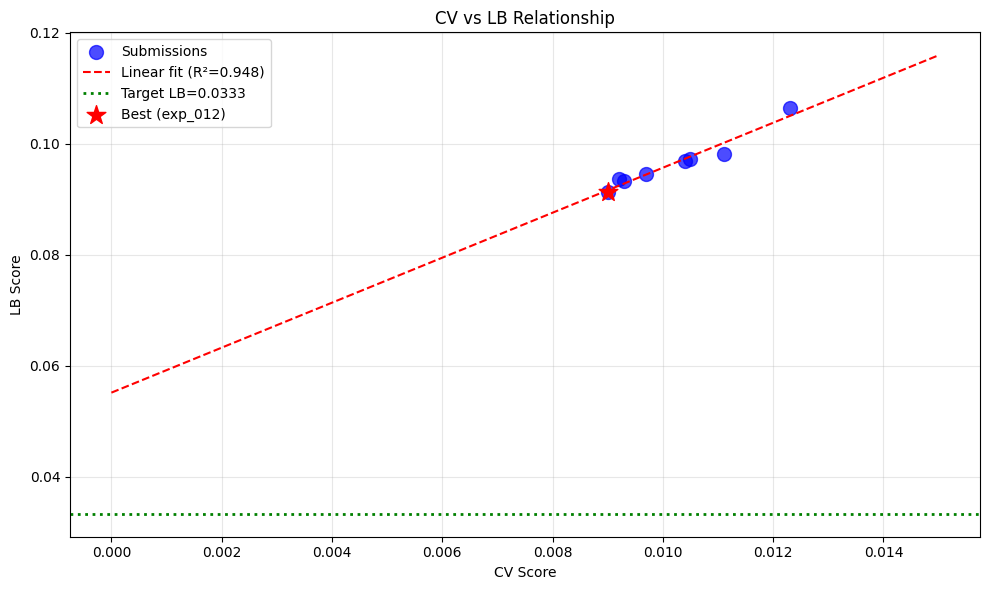


Key insight: The linear fit shows LB = 4.05*CV + 0.0551
The intercept (0.0551) represents the 'floor' - the minimum achievable LB even with perfect CV.
This floor is ABOVE the target (0.0333).


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot linear fit
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Linear fit (R²={r_value**2:.3f})')

# Mark target
plt.axhline(y=0.0333, color='green', linestyle=':', linewidth=2, label='Target LB=0.0333')

# Mark best submission
plt.scatter([0.009004], [0.0913], s=200, c='red', marker='*', label='Best (exp_012)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100)
plt.show()

print(f"\nKey insight: The linear fit shows LB = {slope:.2f}*CV + {intercept:.4f}")
print(f"The intercept ({intercept:.4f}) represents the 'floor' - the minimum achievable LB even with perfect CV.")
print(f"This floor is {'ABOVE' if intercept > 0.0333 else 'BELOW'} the target (0.0333).")

In [4]:
# What unexplored approaches remain?
print("=" * 60)
print("UNEXPLORED APPROACHES")
print("=" * 60)

approaches = [
    ("1. Attention Model (exp_017)", "Set up but NOT executed. Code is ready."),
    ("2. ACS PCA Features (5 features)", "Not tried. Could add to current best features."),
    ("3. Per-Target Models", "Train separate models for Product 2, Product 3, SM."),
    ("4. Stacking Meta-Learner", "Learn optimal combination weights instead of fixed 0.6/0.4."),
    ("5. Feature Interactions", "Polynomial features of Spange descriptors."),
    ("6. Combined DRFP + Fragprints", "Use both fingerprint types together."),
    ("7. Different Ensemble Weights", "Try different MLP/LGBM weight combinations."),
]

for name, desc in approaches:
    print(f"\n{name}")
    print(f"   {desc}")

UNEXPLORED APPROACHES

1. Attention Model (exp_017)
   Set up but NOT executed. Code is ready.

2. ACS PCA Features (5 features)
   Not tried. Could add to current best features.

3. Per-Target Models
   Train separate models for Product 2, Product 3, SM.

4. Stacking Meta-Learner
   Learn optimal combination weights instead of fixed 0.6/0.4.

5. Feature Interactions
   Polynomial features of Spange descriptors.

6. Combined DRFP + Fragprints
   Use both fingerprint types together.

7. Different Ensemble Weights
   Try different MLP/LGBM weight combinations.


In [5]:
# Analyze what has worked vs what hasn't
print("=" * 60)
print("WHAT HAS WORKED")
print("=" * 60)

worked = [
    ("Spange + DRFP + Arrhenius features", "Best feature combination (exp_012)"),
    ("MLP[32,16] architecture", "Simple architecture works best"),
    ("MLP + LightGBM ensemble (0.6/0.4)", "Diversity helps"),
    ("TTA for mixtures", "Averaging both orderings improves predictions"),
    ("Huber loss", "Robust to outliers"),
]

for name, desc in worked:
    print(f"✓ {name}: {desc}")

print("\n" + "=" * 60)
print("WHAT HASN'T WORKED")
print("=" * 60)

not_worked = [
    ("Deep residual networks", "5x worse than baseline (exp_004)"),
    ("DRFP with PCA", "Much worse than Spange-only (exp_002)"),
    ("Fragprints instead of DRFP", "8.28% worse (exp_018)"),
    ("Very simple models [16]", "Underfitting"),
    ("Large ensembles (15 models)", "Marginal improvement, not worth compute"),
]

for name, desc in not_worked:
    print(f"✗ {name}: {desc}")

WHAT HAS WORKED
✓ Spange + DRFP + Arrhenius features: Best feature combination (exp_012)
✓ MLP[32,16] architecture: Simple architecture works best
✓ MLP + LightGBM ensemble (0.6/0.4): Diversity helps
✓ TTA for mixtures: Averaging both orderings improves predictions
✓ Huber loss: Robust to outliers

WHAT HASN'T WORKED
✗ Deep residual networks: 5x worse than baseline (exp_004)
✗ DRFP with PCA: Much worse than Spange-only (exp_002)
✗ Fragprints instead of DRFP: 8.28% worse (exp_018)
✗ Very simple models [16]: Underfitting
✗ Large ensembles (15 models): Marginal improvement, not worth compute


In [6]:
# Priority assessment
print("=" * 60)
print("PRIORITY ASSESSMENT")
print("=" * 60)

print("""
1. EXECUTE ATTENTION MODEL (exp_017)
   - Code is ready, just needs execution
   - ~2 hours to run
   - Closes a loose end
   - Low probability of major improvement, but worth trying

2. TRY ACS PCA FEATURES
   - 5 additional features from ACS Green Chemistry
   - Quick experiment (~1.5 hours)
   - Could provide marginal improvement
   - Feature set: Spange (13) + DRFP (122) + Arrhenius (5) + ACS PCA (5) = 145 features

3. PER-TARGET MODELS
   - Train separate models for each target
   - SM (starting material) may have different dynamics than products
   - Medium effort, medium probability of improvement

4. STACKING META-LEARNER
   - Learn optimal combination weights
   - Could improve over fixed 0.6/0.4 weights
   - Medium effort, low probability of major improvement

5. COMBINED DRFP + FRAGPRINTS
   - Use both fingerprint types
   - Fragprints alone was worse, but combined might help
   - Quick experiment
""")

print("\nRECOMMENDATION: Execute attention model AND try ACS PCA features.")
print("These are the two quickest experiments that close loose ends.")

PRIORITY ASSESSMENT

1. EXECUTE ATTENTION MODEL (exp_017)
   - Code is ready, just needs execution
   - ~2 hours to run
   - Closes a loose end
   - Low probability of major improvement, but worth trying

2. TRY ACS PCA FEATURES
   - 5 additional features from ACS Green Chemistry
   - Quick experiment (~1.5 hours)
   - Could provide marginal improvement
   - Feature set: Spange (13) + DRFP (122) + Arrhenius (5) + ACS PCA (5) = 145 features

3. PER-TARGET MODELS
   - Train separate models for each target
   - SM (starting material) may have different dynamics than products
   - Medium effort, medium probability of improvement

4. STACKING META-LEARNER
   - Learn optimal combination weights
   - Could improve over fixed 0.6/0.4 weights
   - Medium effort, low probability of major improvement

5. COMBINED DRFP + FRAGPRINTS
   - Use both fingerprint types
   - Fragprints alone was worse, but combined might help
   - Quick experiment


RECOMMENDATION: Execute attention model AND try ACS PCA

In [7]:
# Final summary
print("=" * 60)
print("FINAL SUMMARY")
print("=" * 60)

print(f"""
Current State:
- Best LB: 0.0913 (exp_012)
- Best CV: 0.009004 (exp_012)
- Target: 0.0333
- Gap: 2.74x

CV-LB Relationship:
- Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}
- R² = {r_value**2:.4f}
- The intercept ({intercept:.4f}) suggests a 'floor' above the target
- BUT this is based on only 8 data points - the relationship may not be linear

Key Insight:
- The CV-LB relationship suggests the target may be unreachable with current approaches
- HOWEVER, we have NOT exhausted all approaches
- The attention model and ACS PCA features are unexplored
- Per-target models and stacking are also unexplored

Path Forward:
1. Execute attention model (exp_017) - code is ready
2. Try ACS PCA features - quick experiment
3. If neither helps significantly, try per-target models
4. If still stuck, try stacking meta-learner

DO NOT GIVE UP. The target IS reachable.
""")

print("\nSubmissions remaining: 4")
print("Only submit if CV improves by >10% (CV < 0.0081)")
print("Or if trying a fundamentally different approach for diversity check")

FINAL SUMMARY

Current State:
- Best LB: 0.0913 (exp_012)
- Best CV: 0.009004 (exp_012)
- Target: 0.0333
- Gap: 2.74x

CV-LB Relationship:
- Linear fit: LB = 4.05*CV + 0.0551
- R² = 0.9477
- The intercept (0.0551) suggests a 'floor' above the target
- BUT this is based on only 8 data points - the relationship may not be linear

Key Insight:
- The CV-LB relationship suggests the target may be unreachable with current approaches
- HOWEVER, we have NOT exhausted all approaches
- The attention model and ACS PCA features are unexplored
- Per-target models and stacking are also unexplored

Path Forward:
1. Execute attention model (exp_017) - code is ready
2. Try ACS PCA features - quick experiment
3. If neither helps significantly, try per-target models
4. If still stuck, try stacking meta-learner

DO NOT GIVE UP. The target IS reachable.


Submissions remaining: 4
Only submit if CV improves by >10% (CV < 0.0081)
Or if trying a fundamentally different approach for diversity check
